**Datasets can be downloaded from https://www.dropbox.com/sh/yqlclftyolwqy7y/AADVD-_IOqpXQx8PlWcywMypa?dl=0**  
Ref: Olsson, A. et al. Single-cell analysis of mixed-lineage states leading to a binary cell fate choice. Nature (2016).

In [1]:
%matplotlib inline

In [2]:
import stream as st
st.__version__

'0.3.5'

In [3]:
adata=st.read(file_name='./data_Olsson.tsv.gz')

Using default working directory.
Saving results in: /Users/hardy/Desktop/tutorial/2/stream_result


In [4]:
st.add_cell_labels(adata,file_name='./cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='./cell_label_color.tsv.gz')

In [5]:
st.filter_genes(adata,min_num_cells = max(5,int(round(adata.shape[0]*0.001))),
                min_pct_cells = None,expr_cutoff = 1)

Filter genes based on min_num_cells
After filtering out low-expressed genes: 
382 cells, 12188 genes


610 variable genes are selected


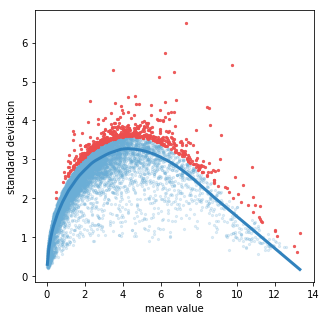

In [6]:
st.select_variable_genes(adata)

In [7]:
st.dimension_reduction(adata,n_components=4)

4 cpus are being used ...


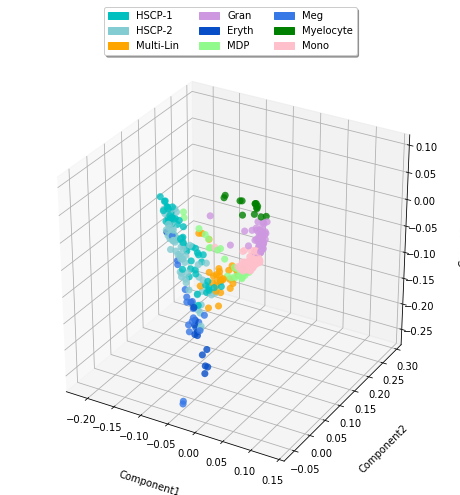

In [8]:
st.plot_dimension_reduction(adata)

In [9]:
st.seed_elastic_principal_graph(adata)

Seeding initial elastic principal graph...
Clustering...
Affinity propagation ...
The number of initial nodes is 16
Calculatng minimum spanning tree...
Number of initial branches: 5


In [10]:
st.elastic_principal_graph(adata)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 382 points and 4 dimensions"


[1]
 "Using a single core"


Nodes = 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||50
	
0.000868
	
50
	
49
	
44
	
2
	
0
	
0
	
0.0004798
	
0.0004605
	
0.9543
	
0.9561
	
0.0003388
	
4.937e-05
	
0.002469
	
0.1234
	
0


17.246 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 5


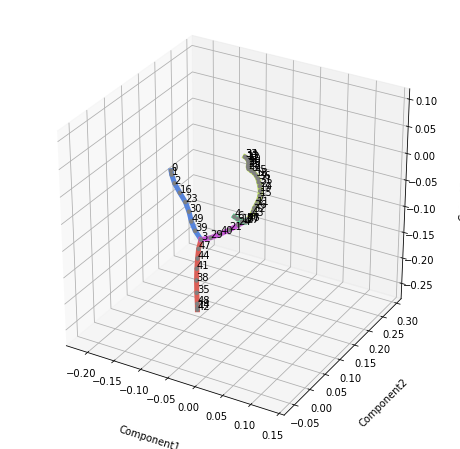

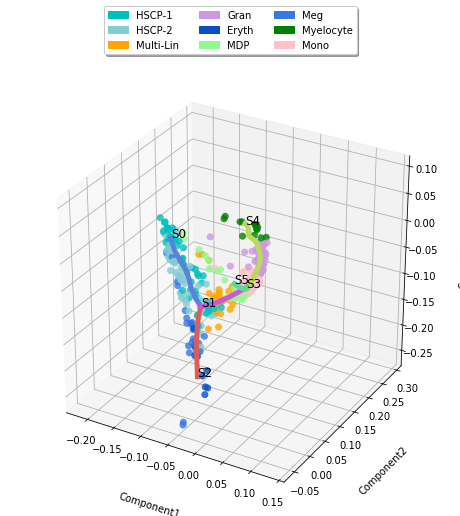

In [11]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Optimizing branching...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 80 nodes on 382 points and 4 dimensions"


[1]
 "Using a single core"


Nodes = 
50
 
51
 
52
 
53
 
54
 
55
 
56
 
57
 
58
 
59
 
60
 
61
 
62
 
63
 
64
 
65
 
66
 
67
 
68
 
69
 
70
 
71
 
72
 
73
 
74
 
75
 
76
 
77
 
78
 
79
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||80
	
0.0005297
	
80
	
79
	
74
	
2
	
0
	
0
	
0.0003183
	
0.0003067
	
0.9697
	
0.9708
	
0.0001684
	
4.307e-05
	
0.003446
	
0.2756
	
0


3.329 sec elapsed

Number of branches after optimizing branching: 5


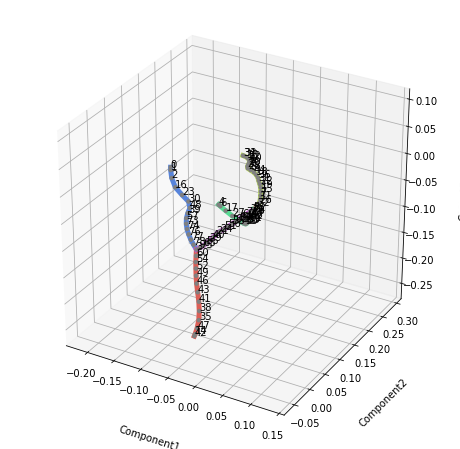

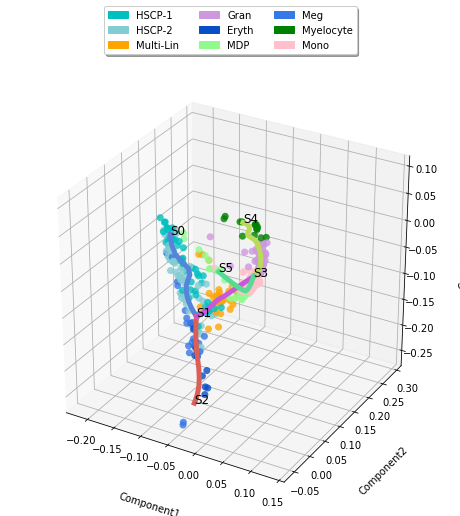

In [12]:
st.optimize_branching(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Shifting branching point to denser area ...
[1]
 "Moving the branching point at node 4"


[1]
 "Moving the branching point at node 6"


[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 73 nodes on 382 points and 4 dimensions"


[1]
 "Using a single core"


0.014 sec elapsed

Number of branches after shifting branching: 5


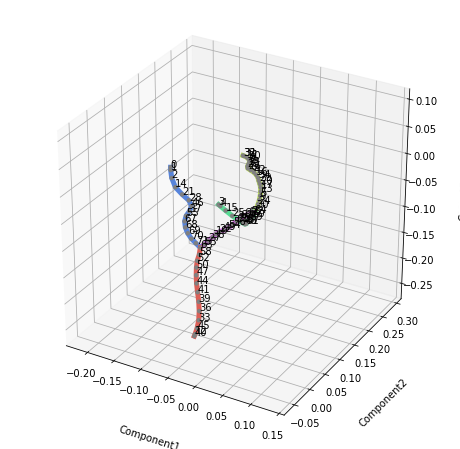

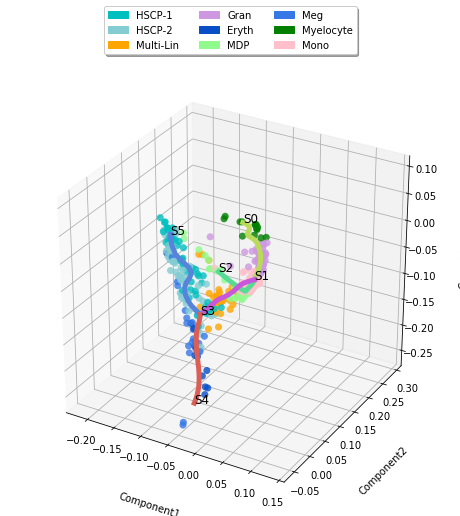

In [13]:
st.shift_branching(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 5


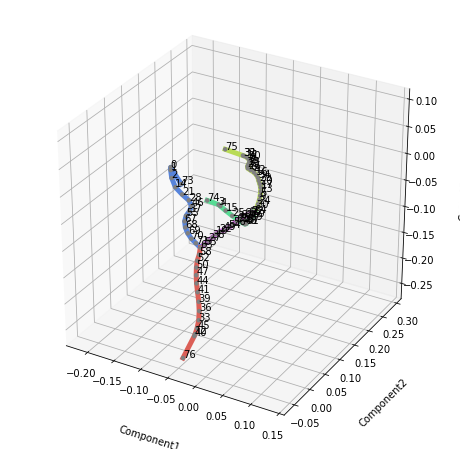

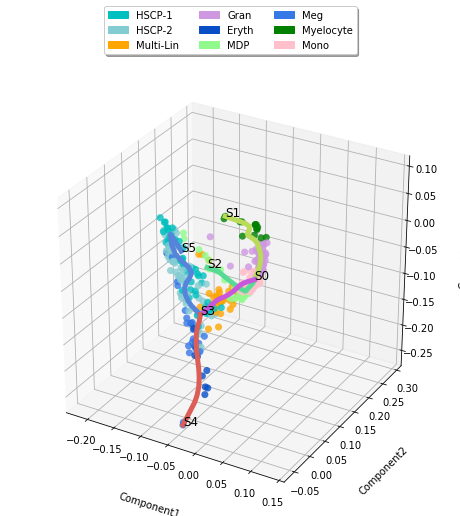

In [14]:
st.extend_elastic_principal_graph(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

/Users/hardy/anaconda3/envs/stream/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


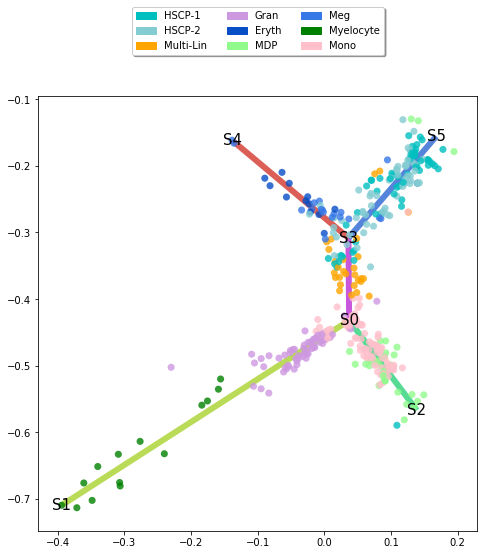

In [15]:
st.plot_flat_tree(adata)

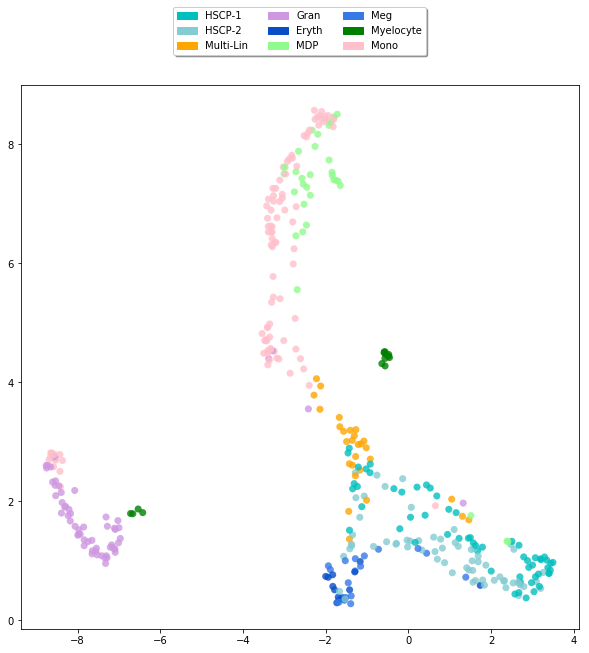

In [16]:
st.plot_visualization_2D(adata,use_precomputed=False,nb_pct=0.9)

Importing precomputed umap visualization ...


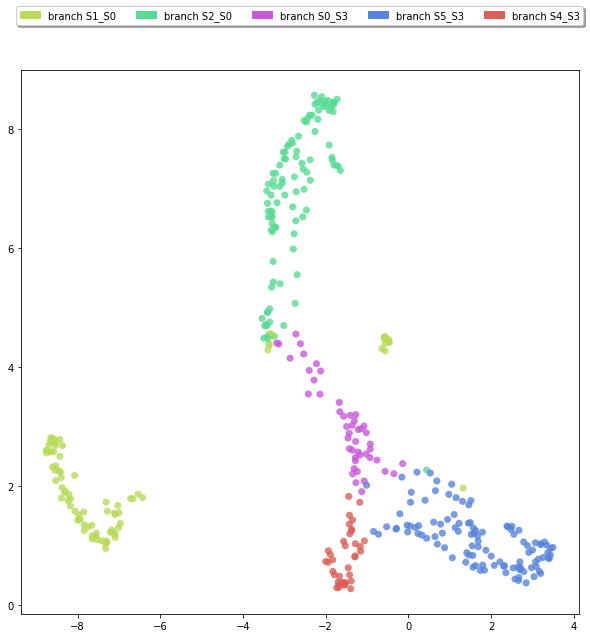

In [17]:
st.plot_visualization_2D(adata,color_by='branch',fig_legend_ncol=6)

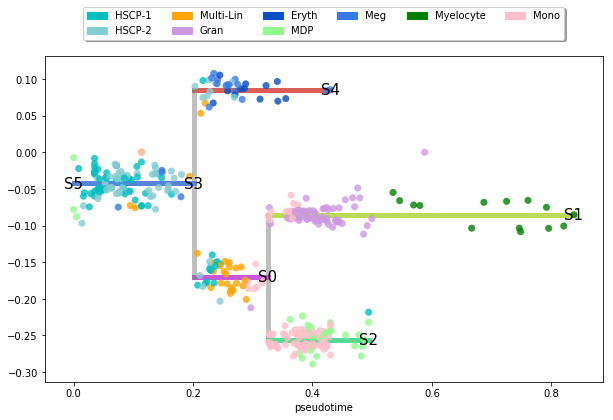

In [18]:
st.subwaymap_plot(adata,percentile_dist=100,root='S5',fig_legend_ncol=6) 

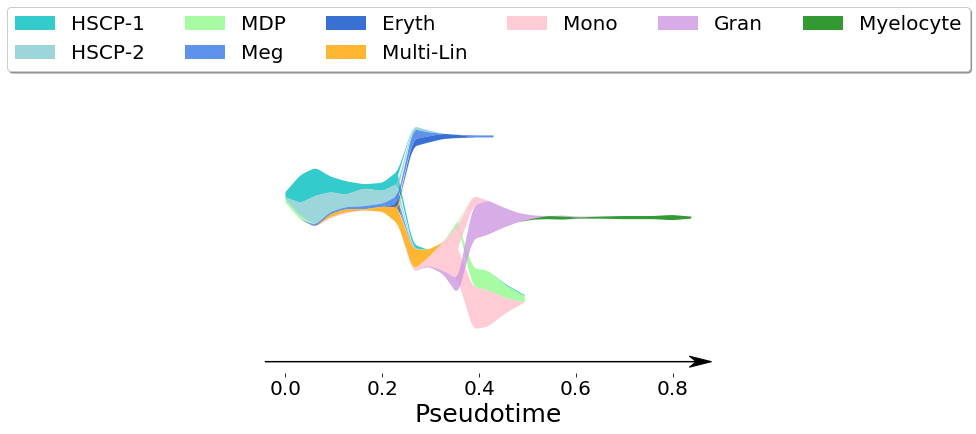

In [19]:
st.stream_plot(adata,root='S5',fig_legend_ncol=6,fig_size=(8,8))

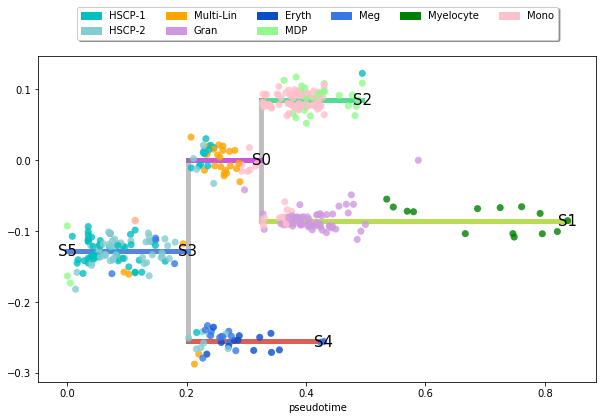

In [20]:
st.subwaymap_plot(adata,percentile_dist=100,root='S5',fig_legend_ncol=6,preference=['S2','S1','S4']) 

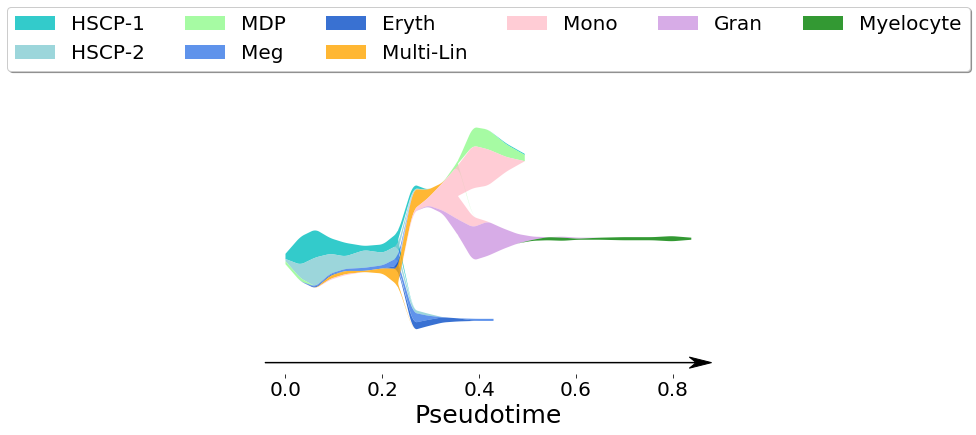

In [21]:
st.stream_plot(adata,root='S5',fig_legend_ncol=6,fig_size=(8,8),preference=['S2','S1','S4'])

In [22]:
st.write(adata)

## mapping

In [23]:
adata_new=st.read(file_name='./data_perturbation.tsv.gz',workdir='./result_mapping/')
st.add_cell_labels(adata_new,file_name='./cell_perturbation_label.tsv.gz')
st.add_cell_colors(adata_new,file_name='./cell_perturbation_label_color.tsv.gz')

Saving results in: ./result_mapping/


In [24]:
st.map_new_data(adata,adata_new)

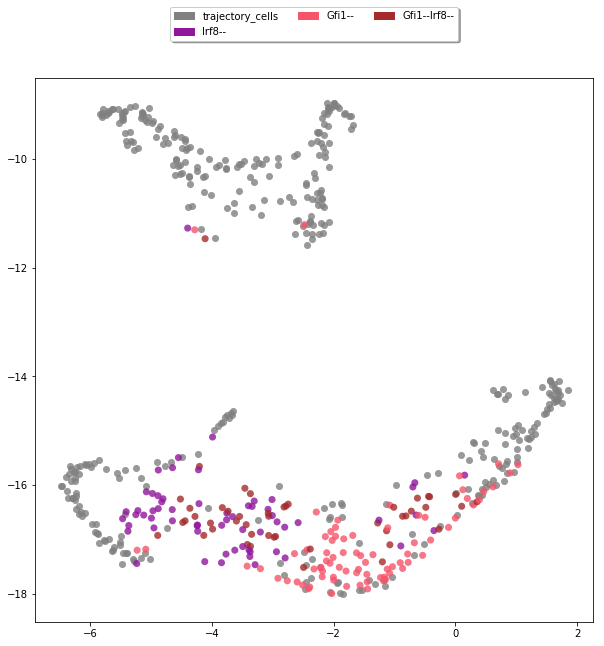

In [25]:
st.plot_visualization_2D(adata,adata_new=adata_new,nb_pct=0.8,use_precomputed=False)

Importing precomputed umap visualization ...


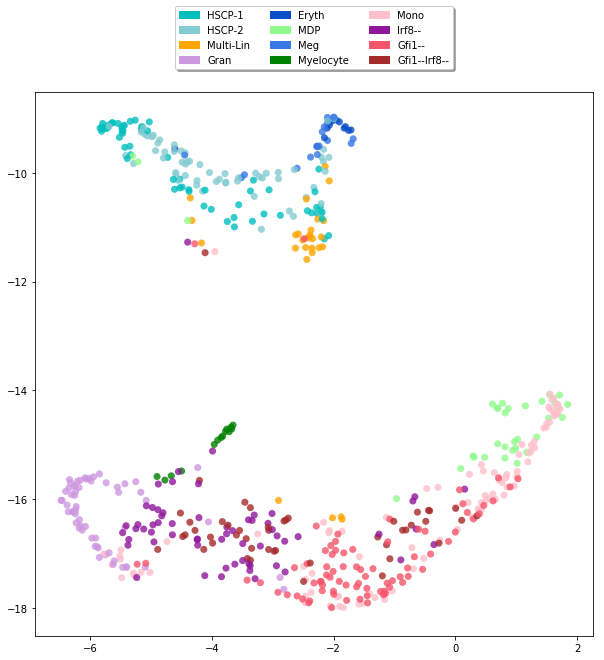

In [26]:
st.plot_visualization_2D(adata,adata_new=adata_new,show_all_colors=True)

Importing precomputed umap visualization ...


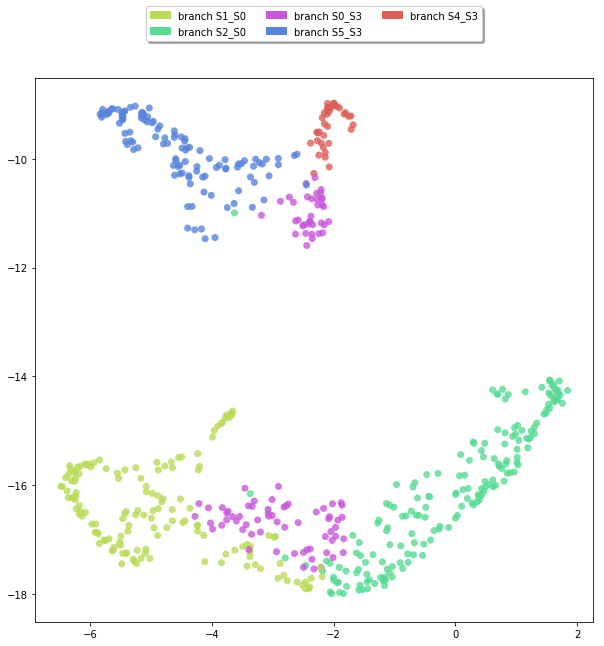

In [27]:
st.plot_visualization_2D(adata,adata_new=adata_new,color_by='branch')

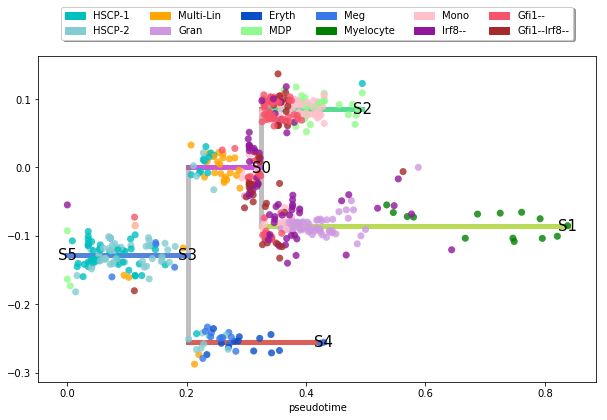

In [28]:
st.subwaymap_plot(adata,adata_new=adata_new,percentile_dist=100,root='S5',fig_legend_ncol=6,preference=['S2','S1','S4']) 

In [29]:
df_Gfi1_Null = adata_new.obs[adata_new.obs.label == 'Gfi1--' ]

In [30]:
df_Irf8_Null = adata_new.obs[adata_new.obs.label == 'Irf8--' ]

In [31]:
df_Gfi1_Irf8_Null = adata_new.obs[adata_new.obs.label == 'Gfi1--Irf8--' ]

In [32]:
adata_new_Gfi1_Null = adata_new[adata_new.obs.label == 'Gfi1--' ].copy()

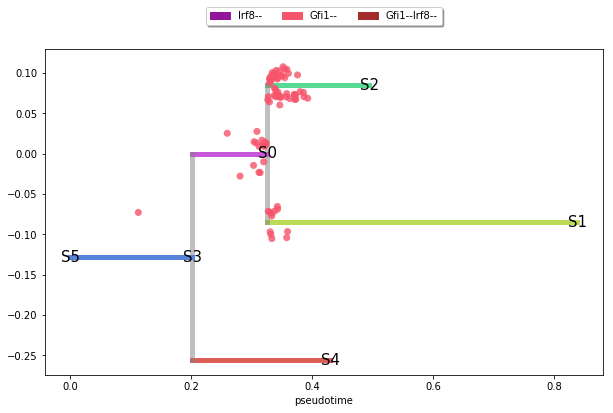

In [33]:
st.subwaymap_plot(adata,adata_new=adata_new_Gfi1_Null,show_all_cells=False,
               percentile_dist=100,root='S5',fig_legend_ncol=6,preference=['S2','S1','S4']) 

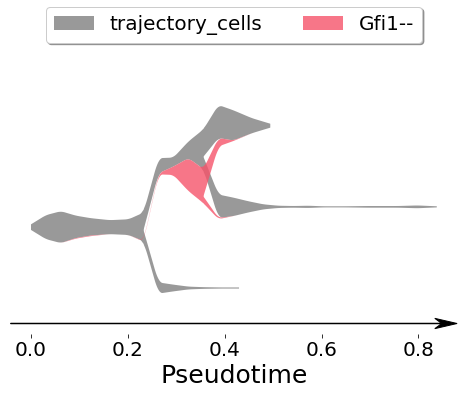

In [34]:
st.stream_plot(adata,adata_new=adata_new_Gfi1_Null,show_all_colors=False,
            root='S5',fig_legend_ncol=6,fig_size=(8,8),preference=['S2','S1','S4']) 

In [35]:
adata_new_Irf8_Null = adata_new[adata_new.obs.label == 'Irf8--' ].copy()

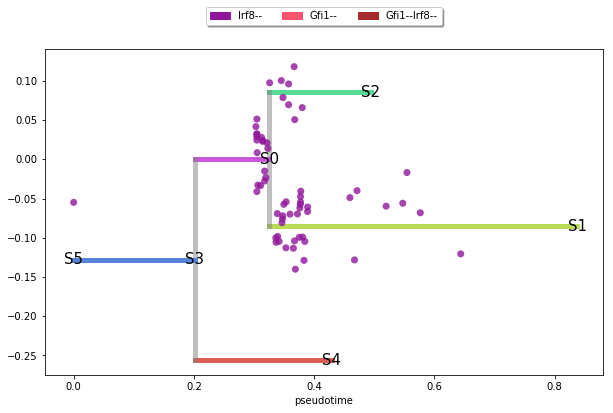

In [36]:
st.subwaymap_plot(adata,adata_new=adata_new_Irf8_Null,show_all_cells=False,
               percentile_dist=100,root='S5',fig_legend_ncol=6,preference=['S2','S1','S4']) 

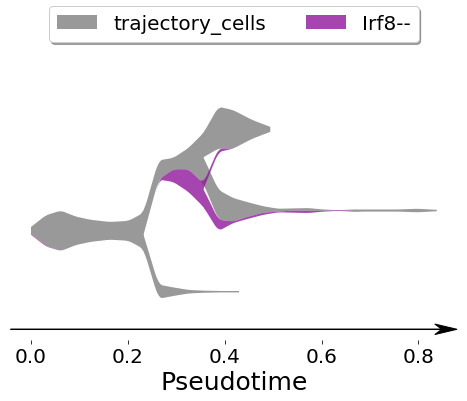

In [37]:
st.stream_plot(adata,adata_new=adata_new_Irf8_Null,show_all_colors=False,
            root='S5',fig_legend_ncol=6,fig_size=(8,8),preference=['S2','S1','S4']) 

In [38]:
adata_new_Gfi1_Irf8_Null = adata_new[adata_new.obs.label == 'Gfi1--Irf8--' ].copy()

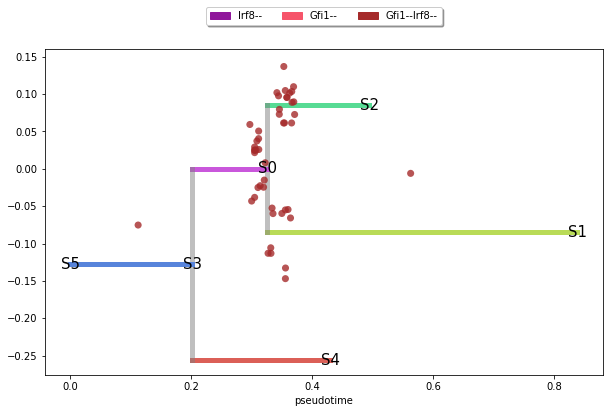

In [39]:
st.subwaymap_plot(adata,adata_new=adata_new_Gfi1_Irf8_Null,show_all_cells=False,
               percentile_dist=100,root='S5',fig_legend_ncol=6,preference=['S2','S1','S4']) 

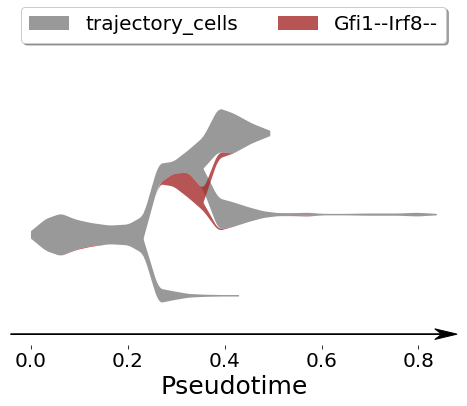

In [40]:
st.stream_plot(adata,adata_new=adata_new_Gfi1_Irf8_Null,show_all_colors=False,
            root='S5',fig_legend_ncol=6,fig_size=(8,8),preference=['S2','S1','S4']) 

In [41]:
st.write(adata)
st.write(adata_new)